# **Question 1:  DCGANs and more**

<font>
<p>In this question we will expand on your knowledge about Generative Adversarial Networks (GANs). Building on top of what we have already implemented, the primary task in this question is to implement a Deep Convolutional GAN (DCGAN).</p>
<p>You can read about GANs from online resources and understand its working principles. To get an insight into the power of advanced GANs, check out this.</p>
<p>Simply speaking, a DCGAN is a type of GAN that uses a CNN as discriminator whereas for the generator it uses an architecture similar to a CNN but instead of normal convolution layers, it is composed of transposed convolutions. You can read more about DCGAN in the original DCGAN paper.</p>
<p>To successfully complete the question, you need to complete all the parts below. Make sure to cite all the sources used.</p>
</font>


# **Part 1: Loading the Data**
Load any one of the datasets from the list below, that you think is interesting to
work, on in your notebook (only the training dataset). We would recommend you
guys to downscale the images i.e., 64x64 or 32x32 and if needed, also convert
the image to greyscale. [5]

List of Datasets:

- Flowers
- Aircrafts
- Cute Dogs **✔**

In [ ]:
# rm -rf data/

import requests
import tarfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
dog_image_path = data_path / "StanfordDogs"

# If the image folder doesn't exist, download it and prepare it...
if dog_image_path.is_dir():
    print(f"{dog_image_path} directory exists.")
else:
    print(f"Did not find {dog_image_path} directory, creating one...")
    dog_image_path.mkdir(parents=True, exist_ok=True)

    # Download Stanford Dogs dataset
    with open(data_path / "images.tar", "wb") as f:
        request = requests.get("http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar")
        print("Downloading Stanford Dogs dataset...")
        f.write(request.content)

    # Extract Stanford Dogs dataset
    with tarfile.open(data_path / "images.tar", "r") as tar_ref:
        print("Extracting Stanford Dogs dataset...")
        tar_ref.extractall(dog_image_path)

Did not find data/StanfordDogs directory, creating one...
Extracting Stanford Dogs dataset...


In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(dog_image_path)

There are 1 directories and 0 images in 'data/StanfordDogs'.
There are 120 directories and 0 images in 'data/StanfordDogs/Images'.
There are 0 directories and 210 images in 'data/StanfordDogs/Images/n02111129-Leonberg'.
There are 0 directories and 150 images in 'data/StanfordDogs/Images/n02102973-Irish_water_spaniel'.
There are 0 directories and 209 images in 'data/StanfordDogs/Images/n02110806-basenji'.
There are 0 directories and 152 images in 'data/StanfordDogs/Images/n02105251-briard'.
There are 0 directories and 169 images in 'data/StanfordDogs/Images/n02093991-Irish_terrier'.
There are 0 directories and 152 images in 'data/StanfordDogs/Images/n02099267-flat-coated_retriever'.
There are 0 directories and 150 images in 'data/StanfordDogs/Images/n02110627-affenpinscher'.
There are 0 directories and 196 images in 'data/StanfordDogs/Images/n02112137-chow'.
There are 0 directories and 172 images in 'data/StanfordDogs/Images/n02094114-Norfolk_terrier'.
There are 0 directories and 197 im

In [ ]:
import os
import random
import shutil
from pathlib import Path


def moveFiles(source_dir, destDir):
    files = os.listdir(source_dir)
    num_files = len(files)

    for i, file_ in enumerate(files):
        source_file = os.path.join(source_dir, file_)
        dest_file = os.path.join(destDir, file_)

        shutil.move(source_file, dest_file)

        print(f"Moved {i+1} files to destination folder")

# Update the directory path for the Stanford Dogs dataset
dog_image_path = Path("data/StanfordDogs")

# Update the path to the directory containing dog breed folders
StanDogDirPath = dog_image_path

# Create a list of dog breeds
dogs = [i for i in os.listdir(StanDogDirPath) if os.path.isdir(os.path.join(StanDogDirPath, i))]

# Create a directory for training images
trainDir = dog_image_path / "GAN_Train_Stanford_Dog_Photos"
trainDir.mkdir(parents=True, exist_ok=True)

# Move images from each breed directory to the training directory
for dog in dogs:
    sourceDirectory = StanDogDirPath / dog
    moveFiles(sourceDirectory, trainDir)

Moved 1 files to destination folder
Moved 2 files to destination folder
Moved 3 files to destination folder
Moved 4 files to destination folder
Moved 5 files to destination folder
Moved 6 files to destination folder
Moved 7 files to destination folder
Moved 8 files to destination folder
Moved 9 files to destination folder
Moved 10 files to destination folder
Moved 11 files to destination folder
Moved 12 files to destination folder
Moved 13 files to destination folder
Moved 14 files to destination folder
Moved 15 files to destination folder
Moved 16 files to destination folder
Moved 17 files to destination folder
Moved 18 files to destination folder
Moved 19 files to destination folder
Moved 20 files to destination folder
Moved 21 files to destination folder
Moved 22 files to destination folder
Moved 23 files to destination folder
Moved 24 files to destination folder
Moved 25 files to destination folder
Moved 26 files to destination folder
Moved 27 files to destination folder
Moved 28 f

## **Transforming Dataset And Creating Dataloaders**

In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Update the directory path for the Stanford Dogs dataset
dog_image_path = Path("data/StanfordDogs/GAN_Train_Stanford_Dog_Photos")

# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Converting to Grayscale
    # transforms.Grayscale(num_output_channels=3),
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

In [ ]:
train_data = datasets.ImageFolder(root=dog_image_path, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  )

print(f"Train data:\n{train_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 20580
    Root location: data/StanfordDogs/GAN_Train_Stanford_Dog_Photos
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
batchSize = 64

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batchSize, # how many samples per batch?
                              shuffle=True) # shuffle the data?

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

## **Now to verify that data is Pre-processed successfully, here is the code to randomly pick the images and to show them.**

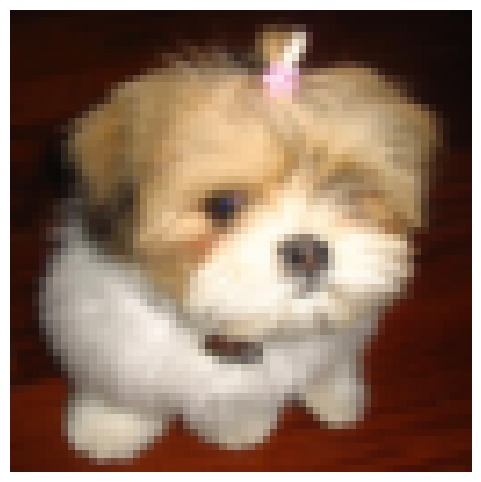

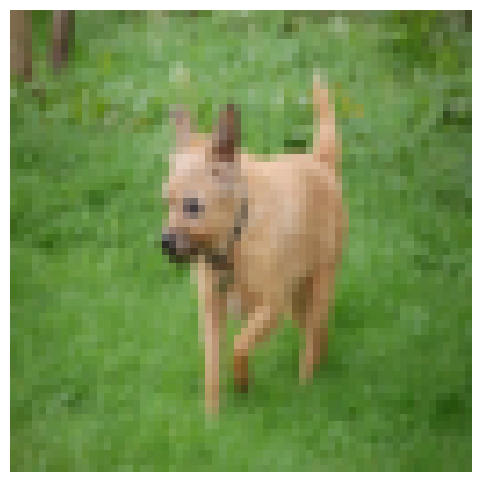

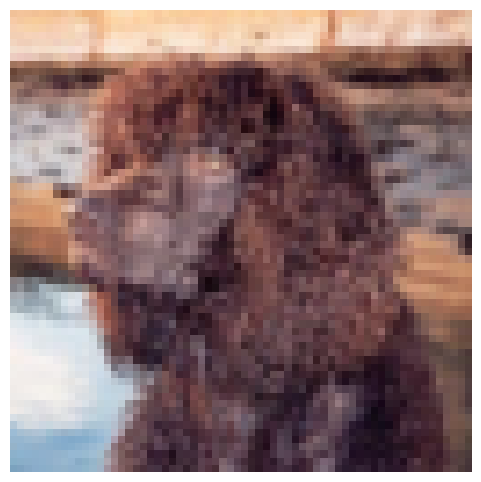

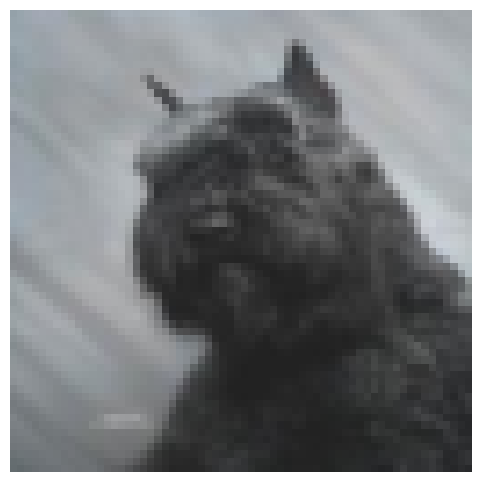

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display an image
def imshow(image):
    npimg = image.numpy()
    plt.figure(figsize=(6, 6))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get a batch of images
images, _ = next(iter(train_dataloader))

# Show only a few images in separate windows
num_images_to_show = 4
for i in range(num_images_to_show):
    imshow(images[i])


# **Part 2: CNN based discriminator**
Implement a CNN based discriminator. Justify in no more than 2 lines why have you chosen your architecture for the discriminator. Remember to use only Pytorch in building your networks. [12+3]

In [ ]:
# Implementing the Discriminator of the model

class Discriminator(nn.Module):
    def __init__(self, inputImageChannel):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(inputImageChannel, 128, 4, 2, 1, bias=False)   # Input Layer
        self.conv2 = nn.Conv2d(128, 256, 4, 2, 1, bias=False)
        self.batchnorm2 = nn.BatchNorm2d(256)                             # Using Batch Normalization for Regularization
        self.conv3 = nn.Conv2d(256, 512, 4, 2, 1, bias=False)
        self.batchnorm3 = nn.BatchNorm2d(512)
        self.conv4 = nn.Conv2d(512, 1024, 4, 2, 1, bias=False)
        self.batchnorm4 = nn.BatchNorm2d(1024)
        self.conv5 = nn.Conv2d(1024, 1, 4, 2, 0, bias=False)
        self.leaky_relu = nn.LeakyReLU(0.2, inplace=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input):           # The forward pass of the Discriminator
        x = self.leaky_relu(self.conv1(input))
        x = self.leaky_relu(self.batchnorm2(self.conv2(x)))
        x = self.leaky_relu(self.batchnorm3(self.conv3(x)))
        x = self.leaky_relu(self.batchnorm4(self.conv4(x)))
        x = self.sigmoid(self.conv5(x))
        return x


---
## **JUSTIFICATION FOR THE ARCHITECTURE**
---
We chose the following Convolutional Neural Network (CNN) architecture for the discriminator because it captures features in images, adequetly as shown in the accuracy and loss calculation. The choosen architecture comprises of **5** convolutional layers, each followed by batch normalization and LeakyReLU activation. In the output layer we have Sigmoid function for classification. This architecture proved to be effective in feature extraction and discrimination, while batch normalization fastens the convergence process and LeakyReLU mitigates the vanishing gradient problem.

# **Part 3: Implementing Generator**
Implement a generator that starts with a noise vector and generates an image from it.
Also, can we change the dimension of the starting vector? What effect would it have on
the result of your generator (research and write your best guess, you will be evaluated
for your thought process) [12+3]

In [ ]:
# Implementing the Generator of the model

class Generator(nn.Module):
    def __init__(self, noiseVectorSize, outputImageChannel):
        super(Generator, self).__init__()
        self.conv1 = nn.ConvTranspose2d(noiseVectorSize, 1024, 4, 1, 0, bias=False)
        self.batchnorm1 = nn.BatchNorm2d(1024)
        self.conv2 = nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias=False)
        self.batchnorm2 = nn.BatchNorm2d(512)
        self.conv3 = nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False)
        self.batchnorm3 = nn.BatchNorm2d(256)
        self.conv4 = nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False)
        self.batchnorm4 = nn.BatchNorm2d(128)
        self.conv5 = nn.ConvTranspose2d(128, outputImageChannel, 4, 2, 1, bias=False)
        self.relu = nn.ReLU(True)
        self.tanh = nn.Tanh()

    def forward(self, input):               # The forward pass of the Generator
        x = self.relu(self.batchnorm1(self.conv1(input)))
        x = self.relu(self.batchnorm2(self.conv2(x)))
        x = self.relu(self.batchnorm3(self.conv3(x)))
        x = self.relu(self.batchnorm4(self.conv4(x)))
        x = self.tanh(self.conv5(x))
        return x


Yes, we can change the dimensionality of the noise vector in the generator. The dimensionality of the noise vector is a hyperparameter that can be adjusted based on the requirements of a specific task and the characteristics of provided dataset.

Changing the dimensionality of the starting vector in the generator can affect the model's capacity to capture complex features and patterns in the input space, potentially leading to more diverse output images. However, it also influences training process, computational complexity, and generalization ability. Higher dimension may require more training data and computational resources while increasing the risk of overfitting if not properly regularized. Conversely, lower dimensions may limit the model's ability to represent diverse information. Empirical evaluation is necessary to determine the optimal dimensionality for a given task and dataset, considering trade-offs between capacity, computational cost, and generalization.

# **Part 4: Completing the Training Loop**
Write the complete training loop for your GAN. Run it for 50 epochs or less, with a batch
size of your liking. You can run it for more epochs, just that it would take painfully long.
Your hyperparameters should be mentioned in a way that they are immediately visible.
[10]

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Hyper-parameters of our training loop
epochs = 20
learning_rate = 0.0004
beta1 = 0.5
input_dim = 100
channel = 3
fixed_noise = torch.randn(64, 100, 1, 1, device=device)

# Define the interval for generating and saving images
image_save_interval = 500

# Define the total number of batches to process for image generation
total_batches = epochs * len(train_dataloader)

counter = 0

# Discriminator initialization
discriminator = Discriminator(channel).to(device)
criterion_d = nn.BCELoss()
optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(beta1, 0.999))

# Generator initialization
generator = Generator(input_dim, channel).to(device)
criterion_g = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate, betas=(beta1, 0.999))

real_label = 1.
fake_label = 0.

images = []
generator_losses = []
discriminator_losses = []

# Training Loop Started

for epoch in range(epochs):
    for count, real_images in enumerate(train_dataloader):

        # Update Discriminator network
        discriminator.zero_grad()
        real_img = real_images[0].to(device)
        batch_size = real_img.size(0)
        label = torch.ones(batch_size, dtype=torch.float, device=device) * real_label
        real_output = torch.flatten(discriminator(real_img))
        real_loss = criterion_d(real_output, label)
        real_loss.backward()


        noise = torch.randn(batch_size, 100, 1, 1, device=device)
        fake = generator(noise)
        label.fill_(fake_label)
        fake_output = torch.flatten(discriminator(fake.detach()))
        fake_loss = criterion_d(fake_output, label)
        fake_loss.backward()


        # Finding the complete loss of the discriminator
        complete_loss = real_loss + fake_loss
        optimizer_d.step()

        # Update Generator network
        generator.zero_grad()
        label.fill_(real_label)
        generator_output = torch.flatten(discriminator(fake))
        generator_loss = criterion_g(generator_output, label)
        generator_loss.backward()
        optimizer_g.step()

        # Updating the losses of generator and discriminator in an array
        generator_losses.append(generator_loss.item())
        discriminator_losses.append(complete_loss.item())

        if count % 40 == 0:
            print('Epoch [%d/%d][%d/%d]\tLoss_Discriminator: %.4f\tLoss_Generator: %.4f'
                  % (epoch+1, epochs, count, len(train_dataloader),
                    complete_loss.item(), generator_loss.item()))



        if counter % image_save_interval == 0:
            with torch.no_grad():
                fake_images = generator(fixed_noise).detach().cpu()
            images.append(vutils.make_grid(fake_images, padding=2, normalize=True))

        counter += 1


Epoch [1/20][0/322]	Loss_Discriminator: 1.4813	Loss_Generator: 15.9298
Epoch [1/20][40/322]	Loss_Discriminator: 0.0083	Loss_Generator: 11.3801
Epoch [1/20][80/322]	Loss_Discriminator: 0.7928	Loss_Generator: 3.7127
Epoch [1/20][120/322]	Loss_Discriminator: 1.1190	Loss_Generator: 4.0215
Epoch [1/20][160/322]	Loss_Discriminator: 0.9486	Loss_Generator: 2.8399
Epoch [1/20][200/322]	Loss_Discriminator: 0.8895	Loss_Generator: 2.6988
Epoch [1/20][240/322]	Loss_Discriminator: 1.2604	Loss_Generator: 1.1903
Epoch [1/20][280/322]	Loss_Discriminator: 1.1778	Loss_Generator: 1.3560
Epoch [1/20][320/322]	Loss_Discriminator: 0.9272	Loss_Generator: 2.6719
Epoch [2/20][0/322]	Loss_Discriminator: 1.4263	Loss_Generator: 4.9079
Epoch [2/20][40/322]	Loss_Discriminator: 0.8867	Loss_Generator: 1.2998
Epoch [2/20][80/322]	Loss_Discriminator: 1.1181	Loss_Generator: 1.1643
Epoch [2/20][120/322]	Loss_Discriminator: 0.9298	Loss_Generator: 2.3011
Epoch [2/20][160/322]	Loss_Discriminator: 0.8333	Loss_Generator: 2.345

# **Part 5: Generator and Discriminator Losses**
Determine your generator and discriminator losses in training. Plotting them would be a
nice practice [5]


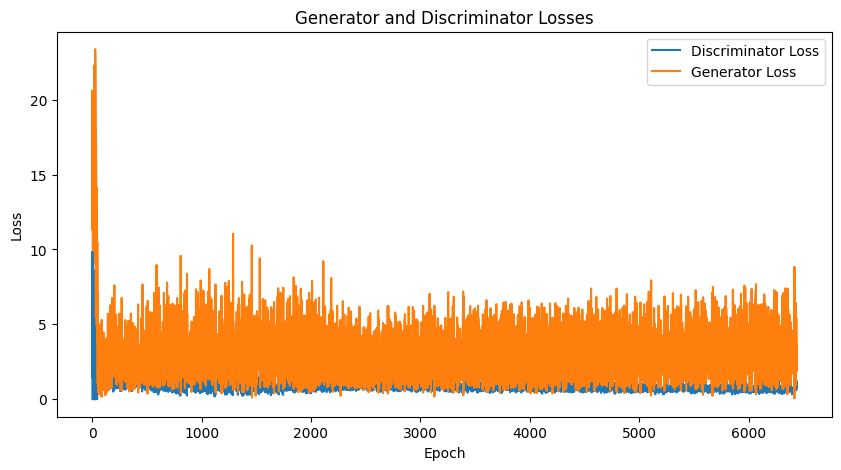

In [ ]:

# Plot losses
plt.figure(figsize=(10, 5))
plt.plot(discriminator_losses, label='Discriminator Loss')
plt.plot(generator_losses, label='Generator Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Generator and Discriminator Losses')
plt.legend()
plt.show()

# **Part 6: Generating Sample pics**
Write a function named “generate_samples” which takes a single argument “n”. This
function will return “n” images generated using the trained generator. Use this function to
generate and display 20 images. [5]



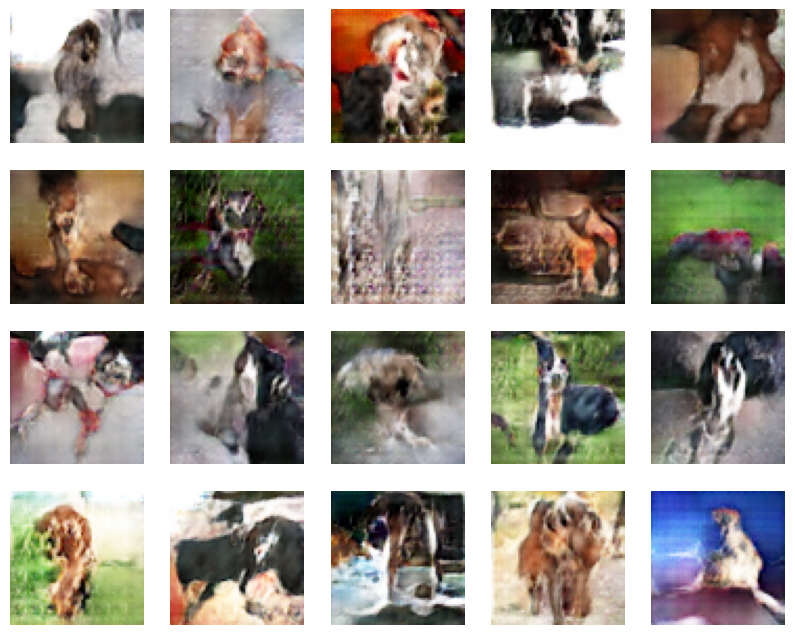

In [ ]:
import matplotlib.pyplot as plt

def generate_and_display_samples(n):
    # Generating images
    noise = torch.randn(n, 100, 1, 1, device=device)
    with torch.no_grad():
        fake_images = generator(noise).cpu()

    # Display the generated images
    fig, axes = plt.subplots(int(n/5), 5, figsize=(10, int(n/5)*2))
    for i, ax in enumerate(axes.flat):
        ax.imshow(fake_images[i].permute(1, 2, 0).numpy())
        ax.axis('off')

    plt.show()

# Generate and display 20 images
generate_and_display_samples(20)


# **Part 7: VGG-16 and GANs**
**This part requires you to go back to the transfer learning idea that was introduced in Assignment 1.**

**a) Can we use a pre-trained VGG-16 network for this GAN? Would the resulting
network still be a DCGAN? [5]**


---



We can indeed use VGG-16 network in this GAN, but its worth to note that the VGG-16 network has Convolution and Maxpooling layers and  it does not have any transpose convolution or de-convolution layers, which is something that the generator in a DCCGAN have. So, using VGG-16 in the GAN architecture would not result in a DCGAN, as it is not fulfilling the criteria of DCGAN and not utilizing the deconvolution layers in it.

However, using VGG-16 into the GAN architecture might provide benefits such as better feature extraction and enhanced training process.


**b) Since a GAN can essentially be thought of as two different networks that run-in
conjunction, a discriminator and a generator. What kind of network is VGG-16, is it
generative or discriminative? Why can it be not used for the other network?**



First of all lets look into the definitions of Descriminators and Generators, in a concise mannerl

- **Generative models** focusses on generating the new data samples that that mirror the distribution of the training data. They capture the features or patterns of the data distribution and can generate fresh samples accordingly.

- **Discriminative models** performs the classification between different classes or categories. These CNN based models learn decision boundaries to classify input data.

Now where does **VGG-16** falls?

- **VGG-16** falls into the category of discriminative models. Its because the primary purpose of this netwrok is to classify images into differnet classes. It is widely used in the task of Object Detection, accordingly.

However this model does not use as Generative model as it does not satisfy the condition of it. Generative models, such as GANs require a different architecture and training approach. They consist of a generator (which generates new data) and a discriminator (which distinguishes real data from generated data). And from here we can see that the VGG-16 architecture lacks the necessary components for generative tasks, which is not having a generator.

**c) Change your GAN from the previous parts to incorporate VGG-16 in it and train it for a
single time only. Does it improve your results? You can argue based on generated
images and losses.**

In [ ]:
# Define the weights for the VGG16 model
weights = torchvision.models.VGG16_Weights.DEFAULT  # .DEFAULT = best available weights

# Initialize the VGG16 model with the specified weights
modelVGG = torchvision.models.vgg16(weights=weights).to(device)

# Freeze the parameters of the feature extractor layersion
for param in modelVGG.features.parameters():
    param.requires_grad = False

# Define the fully connected feed forward classifier layers for the VGG16 model
modelVGG.classifier = torch.nn.Sequential(
    nn.Linear(in_features=25088, out_features=1000, bias=True),
    nn.Linear(in_features=1000, out_features=200, bias=True),
    nn.Linear(in_features=200, out_features=1, bias=True),
    nn.Sigmoid()
).to(device)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


epochs = 5
input_dim = 100
learning_rate = 0.0002    # We tried using learning rate = 0.0004, but we encountered problem of vanishing gradient.
beta1 = 0.5
channel = 3



fixed_noise = torch.randn(64, 100, 1, 1, device=device)

# Define the interval for generating and saving images
image_save_interval = 500

# Define the total number of batches to process for image generation
total_batches = epochs * len(train_dataloader)

counter = 0

# Discriminator initialization
discriminator = modelVGG.to(device)
criterion_d = nn.BCELoss()
optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(beta1, 0.999))

# Generator initialization
generator = Generator(input_dim, channel).to(device)
criterion_g = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate, betas=(beta1, 0.999))

real_label = 1.
fake_label = 0.

images = []
generator_losses = []
discriminator_losses = []



for epoch in range(epochs):
    for count, real_images in enumerate(train_dataloader):

        # Update Discriminator network
        discriminator.zero_grad()
        real_img = real_images[0].to(device)
        batch_size = real_img.size(0)
        label = torch.ones(batch_size, dtype=torch.float, device=device) * real_label
        real_output = torch.flatten(discriminator(real_img))
        real_loss = criterion_d(real_output, label)
        real_loss.backward()


        noise = torch.randn(batch_size, 100, 1, 1, device=device)
        fake = generator(noise)
        label.fill_(fake_label)
        fake_output = torch.flatten(discriminator(fake.detach()))
        fake_loss = criterion_d(fake_output, label)
        fake_loss.backward()



        complete_loss = real_loss + fake_loss
        optimizer_d.step()

        # Update Generator network
        generator.zero_grad()
        label.fill_(real_label)
        generator_output = torch.flatten(discriminator(fake))
        generator_loss = criterion_g(generator_output, label)
        generator_loss.backward()
        optimizer_g.step()

        generator_losses.append(generator_loss.item())
        discriminator_losses.append(complete_loss.item())

        if count % 100 == 0:
            print('Epoch [%d/%d][%d/%d]\tLoss_Discriminator: %.4f\tLoss_Generator: %.4f'
                  % (epoch+1, epochs, count, len(train_dataloader),
                    complete_loss.item(), generator_loss.item()))



        if counter % image_save_interval == 0:
            with torch.no_grad():
                fake_images = generator(fixed_noise).detach().cpu()
            images.append(vutils.make_grid(fake_images, padding=2, normalize=True))

        counter += 1


Epoch [1/5][0/322]	Loss_Discriminator: 1.5042	Loss_Generator: 10.6391
Epoch [1/5][100/322]	Loss_Discriminator: 1.6693	Loss_Generator: 13.7416
Epoch [1/5][200/322]	Loss_Discriminator: 1.0025	Loss_Generator: 5.6059
Epoch [1/5][300/322]	Loss_Discriminator: 1.1714	Loss_Generator: 12.8173
Epoch [2/5][0/322]	Loss_Discriminator: 4.0941	Loss_Generator: 17.4968
Epoch [2/5][100/322]	Loss_Discriminator: 0.6763	Loss_Generator: 3.6240
Epoch [2/5][200/322]	Loss_Discriminator: 0.3061	Loss_Generator: 3.4902
Epoch [2/5][300/322]	Loss_Discriminator: 0.6739	Loss_Generator: 7.6692
Epoch [3/5][0/322]	Loss_Discriminator: 0.9277	Loss_Generator: 3.8632
Epoch [3/5][100/322]	Loss_Discriminator: 1.4945	Loss_Generator: 4.0908
Epoch [3/5][200/322]	Loss_Discriminator: 0.5568	Loss_Generator: 3.6992
Epoch [3/5][300/322]	Loss_Discriminator: 0.7206	Loss_Generator: 3.5834
Epoch [4/5][0/322]	Loss_Discriminator: 0.6541	Loss_Generator: 4.3859
Epoch [4/5][100/322]	Loss_Discriminator: 0.2555	Loss_Generator: 2.5171
Epoch [4/5

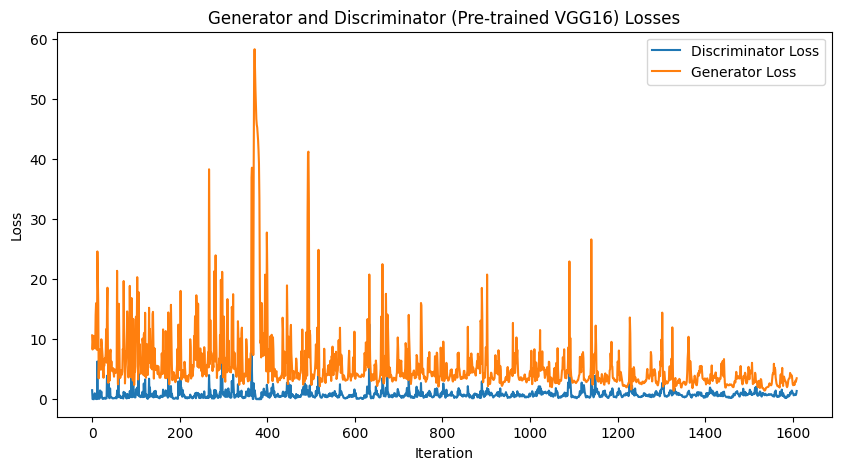

In [ ]:

# Plot losses
plt.figure(figsize=(10, 5))
plt.plot(discriminator_losses, label='Discriminator Loss')
plt.plot(generator_losses, label='Generator Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Generator and Discriminator (Pre-trained VGG16) Losses')
plt.legend()
plt.show()

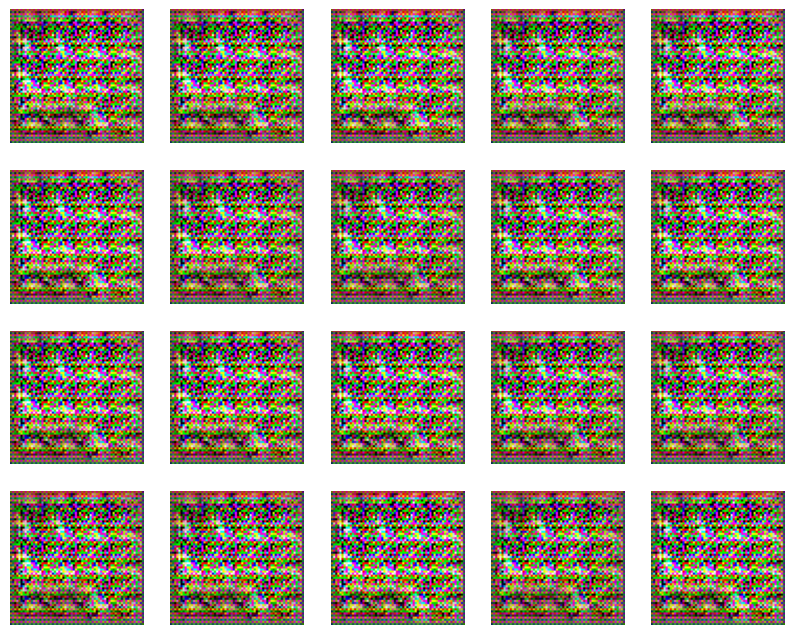

In [ ]:
import matplotlib.pyplot as plt

def generate_and_display_samples(n):
    noise = torch.randn(n, 100, 1, 1, device=device)
    with torch.no_grad():
        fake_images = generator(noise).cpu()

    # Display the generated images
    fig, axes = plt.subplots(int(n/5), 5, figsize=(10, int(n/5)*2))
    for i, ax in enumerate(axes.flat):
        ax.imshow(fake_images[i].permute(1, 2, 0).numpy())
        ax.axis('off')

    plt.show()

# Generate and display 20 images
generate_and_display_samples(20)


---

The standard CNN-based discriminator quickly learns to distinguish real from fake images, with the fair comparable losses to the GAN's Descriminator having  VGG-16 as Discriminator. In contrast, the VGG-16-based discriminator starts with higher losses, shows more variations in learning, but eventually ended up in having lower loss than CNN - based descriminator above.The earlier CNN-based discriminator showed more consistent learning. The VGG-16-based discriminator, however, shows greater changes in losses, indicating potential challenges in convergence. The VGG-16-based discriminator results in higher generator losses compared to the  CNN-based discriminator. This suggests that the VGG-16-based discriminator may provide more hard time to the generator, potentially affecting convergence.

---

# **Part 8: Bonus Question**
<font color="red">[BONUS, max. 20 points in the assignment grade]</font>

Question 2 of this assignment
introduces you to different architectures of GANs. DCGANs are almost 7 years old
now, and as such aren’t the current State of the art for image generation tasks.
Research the current state of the artmethods on your chosen dataset and implement
anyone. Compare with your DCGAN.


# **Question 2:  Read up folks! More GANS.**

<font>
In this question, you will have to read up a bit on the different types of GANS that are found:
Style transfer GAN, CGANS, CycleGAN, SRGANS. Only reading the abstract and introduction
of these papers will equip you to solve these questions, reading them fully is up to you.
Then, go through the given situations and suggest the suitable GAN along with a short but
suitable explanation:
</font>

---

**1. A researcher gave a student the job to perform some preprocessing techniques on an image dataset. The student, while playing around with that data, applies a sufficiently large median blurring kernel to the images, but deletes the original files. These new images were padded correctly as to retain the original size of the images. Which GAN is best suited to revive the original HD images and why?**

---

So we are caught in the situation where we have lost the original files and what we have right now is the set of blurred images of low resolution as compared to the original ones. So the most suitable GAN in this case would be SRGAN (Super-Resolution GAN). This will help in reviving the good quality HD pictures back.

According to theory, SRGAN is designed primarily for single image super-resolution, which is used in the applications such as recovering finer texture details while upscaling the images. This type of GAN uses a perceptual loss function in addition to Generative Adversarial Network (GAN) to generate photo-realistic natural images. Perceptual loss measures the differences in features between the generated high-resolution image buy the generator of GAN and the ground truth high-resolution image.



---

**2. Interns at a computer vision company are tasked with adding different skin textures to images of pandas and regular bears. If presented with a picture of a regular bear, the skin should be changed to match that of a panda. They do not have paired images of pandas and bears that they can use as direct mappings of each other. They have a set of images of pandas, and a different set of images of bears. Which GAN is best suited to achieve this image-to-image translation task and why?**

---

The scenario is that student have to add differnet skin textures to the images of pandas and bears, while having separate sets of images for pandas and regular bears. For the task of adding different skin textures to images of pandas and regular bears without paired images, the most appropriate GAN would be CycleGAN.


According to theory, CycleGAN present an approach for learning to translate an image from a source domain X to a target domain Y in the absence of paired examples.It learns to translate images from one domain to another without requiring paired examples by introducing cycle consistency loss. It learns the mapping G : X → Y and capture the underlying relationship between the two sets of images and generate realistic transformations from one domain to another.


---

**3. A daughter wants to give her Van Gogh-fanatic mother a present. So, she decides to turn a set of family photos to a set that looks as if it's been painted by Van Gogh. Which GAN is best suited to achieve this task and how would she train her model (using what datasets, etc.)?**

---


Here the daughter wanna give the mother a present of family photos, and thats too painted by Van Gogh!

For transforming family photos into images that resemble Van Gogh's paintings, the most suitable GAN would be Style Transfer GAN.

According to theory, Style Transfer GAN is designed for style transfer tasks.  Essentially, it render the content of one image with the style of another. The generator network in StyleGAN operates at multiple scales, allowing it to capture both global and local features of the generated images. This multi-scale architecture helps produce images with realistic details across different levels of resolution.

It can generate stylized images for previously unseen content and style image pairs. In this case, the content images would be the family photos, while the style images would be Van Gogh's paintings.